### CNN 기본 구조

* input - feature extraction(conv & pooling) : 특징 추출 - classification

**image -- convolution -- subsampling(pooling) -- convolution -- subsampling -- fully connected**



### convolution layer and max pooling

In [1]:
import tensorflow as tf
import numpy as np

In [2]:
sess = tf.InteractiveSession()
image = np.array([[[[1], [2], [3]],
                   [[4], [5], [6]],
                   [[7], [8], [9]]
                 ]], dtype=np.float32)

print(image.shape)

(1, 3, 3, 1)


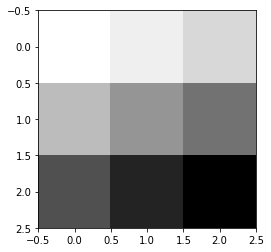

In [3]:
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline

plt.imshow(image.reshape(3, 3), cmap="Greys")
#sns.heatmap(image.reshape(3, 3), annot=True, cmap=sns.light_palette("gray", as_cmap=True))
plt.show()

### Simple convolution layer

image: 1, 3, 3, 1  Filter : 2, 2, 1, 1, stride : 1 x 1, Padding : VALID

* input이 이미지일 경우 마지막 차원의 1은 색깔을 의미하고, 필터의 경우 세번째 차원의 1이 이에 해당한다.
* filter의 마지막 차원의 1은 필터의 갯수를 의미한다. 즉 위의 예는 한장의 필터를 사용한다는 의미이다.

In [4]:
#filter를 weight으로 만든다
weight = tf.constant([[[[1.]], [[1.]]], 
                      [[[1.]], [[1.]]]])
print("weight shape", weight.shape)

weight shape (2, 2, 1, 1)


In [5]:
conv2d = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding="VALID")
conv2d_img = conv2d.eval()
print("conv2d_img.shape", conv2d_img.shape)
conv2d_img

conv2d_img.shape (1, 2, 2, 1)


array([[[[12.],
         [16.]],

        [[24.],
         [28.]]]], dtype=float32)

In [6]:
conv2d_img = np.swapaxes(conv2d_img, 0, 3)  # 바꾸고자 하는 축 두개 번호를 전달받아 두축에 대해서 바꾸게 된다.
print(conv2d_img.shape)
conv2d_img

(1, 2, 2, 1)


array([[[[12.],
         [16.]],

        [[24.],
         [28.]]]], dtype=float32)

[[12. 16.]
 [24. 28.]]


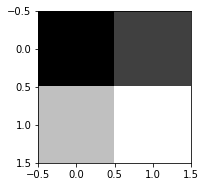

In [7]:
import matplotlib.pylab as plt

for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(2, 2))
    plt.subplot(1, 2, i+1), plt.imshow(one_img.reshape(2, 2), cmap='gray')

### Padding : SAME

stride = 1 x 1 일 때 padding을 SAME으로 설정할 경우, 원래 input 사이즈와 동일한 사이즈를 만들어낸다.

예를 들어 image: 1, 3, 3, 1  Filter: 2, 2, 1, 1  Stride: 1 x 1   Padding: SAME  일 경우,  convolution layer 크기도 3 x 3이 된다.

weight.shape (2, 2, 1, 1)
conv2d_img.shape (1, 3, 3, 1)
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]


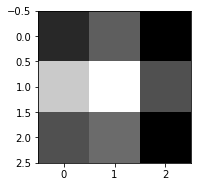

In [11]:
## convolution 계산
weight = tf.constant([[[[1.]], [[1.]]], 
                      [[[1.]], [[1.]]]])
print("weight.shape", weight.shape)
conv2d = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding="SAME")
conv2d_img = conv2d.eval()
print("conv2d_img.shape", conv2d_img.shape)
conv2d_img = np.swapaxes(conv2d_img, 0, 3)  # 바꾸고자 하는 축 두개 번호를 전달받아 두축에 대해서 바꾸게 된다.
#conv2d_img.shape
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(3, 3))
    plt.subplot(1, 2, i+1), plt.imshow(one_img.reshape(3, 3), cmap='gray')

### filter를 3개 사용할 경우 (2, 2, 1, 3)
마지막 차원의 수 3은 필터의 갯수를 가리킴

In [12]:
print("image.shape", image.shape)

image.shape (1, 3, 3, 1)


weight.shape (2, 2, 1, 3)
conv2d_img.shape (1, 3, 3, 3)
conv2d_img.shape (3, 3, 3, 1)
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]
[[120. 160.  90.]
 [240. 280. 150.]
 [150. 170.  90.]]
[[-12. -16.  -9.]
 [-24. -28. -15.]
 [-15. -17.  -9.]]


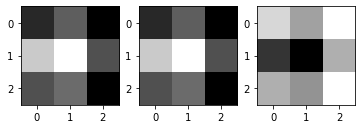

In [20]:
weight = tf.constant([[[[1., 10., -1.]], [[1., 10., -1.]]], 
                      [[[1., 10., -1.]], [[1., 10., -1.]]]])
print("weight.shape", weight.shape)  
conv2d = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding="SAME")
conv2d_img = conv2d.eval()
print("conv2d_img.shape", conv2d_img.shape)
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
print("conv2d_img.shape", conv2d_img.shape)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(3, 3))
    plt.subplot(1, 3, i+1), plt.imshow(one_img.reshape(3, 3), cmap="gray")

convolution layer는 filter 3개의 사용할 경우 마찬가지로 3개가 만들어진다.

### Max Pooling

In [40]:
image = np.array([[[[4], [3]], [[2], [1]]]], dtype=np.float32)
print("image.shape", image.shape)
print(image)
pool = tf.nn.max_pool(image, ksize=[1, 2, 2, 1], strides=[1, 1, 1, 1], padding="SAME") # ksize = filter size
print("pool.shape", pool.shape)
print(pool.eval()) # zero padding에 대하여 각 image의 픽셀의 최대값을 출력

image.shape (1, 2, 2, 1)
[[[[4.]
   [3.]]

  [[2.]
   [1.]]]]
pool.shape (1, 2, 2, 1)
[[[[4.]
   [3.]]

  [[2.]
   [1.]]]]


### 실습

In [42]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


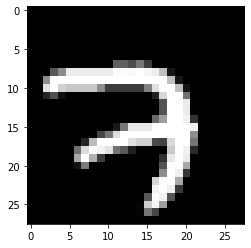

In [43]:
img = mnist.train.images[0].reshape(28, 28)
plt.imshow(img, cmap='gray')
plt.show()

(1, 28, 28, 1)
Tensor("Conv2D_13:0", shape=(1, 14, 14, 5), dtype=float32)


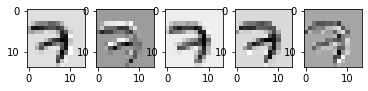

In [50]:
# convolution layer 통과시키기
#sess = tf.InteractiveSession()

img = img.reshape(-1, 28, 28, 1)
print(img.shape)
W1 = tf.Variable(tf.random_normal([3, 3, 1, 5], stddev=0.01))  # 3 x 3 x 1 @ 5 filters
conv2d = tf.nn.conv2d(img, W1, strides=[1, 2, 2, 1], padding="SAME")
print(conv2d)  # o𝑢𝑡𝑝𝑢𝑡𝑠𝑖𝑧𝑒=(𝑁−𝐹)/𝑠𝑡𝑟𝑖𝑑𝑒+1 = (28 - 3) / 2 + 1 = 13.5

sess.run(tf.global_variables_initializer())
conv2d_img = conv2d.eval()
conv2d_img = np.swapaxes(conv2d_img, 0, 3)

for i, one_img in enumerate(conv2d_img):  
    #print(one_img.reshape(14, 14))
    plt.subplot(1, 5, i+1), plt.imshow(one_img.reshape(14, 14), cmap='gray')

위의 필터로 5장의 convolution layer가 도출된다.

Tensor("MaxPool_21:0", shape=(1, 7, 7, 5), dtype=float32)


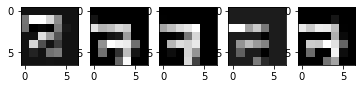

In [53]:
# Max Pooling
pool = tf.nn.max_pool(conv2d, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="SAME") # 14 x 14 -> 7 x 7
print(pool)
sess.run(tf.global_variables_initializer())
pool_img = pool.eval()
pool_img = np.swapaxes(pool_img, 0, 3)
for i, one_img in enumerate(pool_img):
    plt.subplot(1, 5, i+1), plt.imshow(one_img.reshape(7, 7), cmap='gray')